In [1]:
import numpy as np
import keras
import tensorflow as tf

In [2]:
#import dataset

#training
train_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/train",
                                                            color_mode='rgb',
                                                            image_size=(180, 180))

Found 12594 files belonging to 100 classes.


In [3]:
#testing
test_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/test",
                                                            color_mode='rgb',
                                                            image_size=(180, 180))

Found 500 files belonging to 100 classes.


In [4]:
#validating
valid_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/valid",
                                                            color_mode='rgb',
                                                            image_size=(180, 180))

Found 500 files belonging to 100 classes.


In [5]:
train_ds.class_names

['ADONIS',
 'AFRICAN GIANT SWALLOWTAIL',
 'AMERICAN SNOOT',
 'AN 88',
 'APPOLLO',
 'ARCIGERA FLOWER MOTH',
 'ATALA',
 'ATLAS MOTH',
 'BANDED ORANGE HELICONIAN',
 'BANDED PEACOCK',
 'BANDED TIGER MOTH',
 'BECKERS WHITE',
 'BIRD CHERRY ERMINE MOTH',
 'BLACK HAIRSTREAK',
 'BLUE MORPHO',
 'BLUE SPOTTED CROW',
 'BROOKES BIRDWING',
 'BROWN ARGUS',
 'BROWN SIPROETA',
 'CABBAGE WHITE',
 'CAIRNS BIRDWING',
 'CHALK HILL BLUE',
 'CHECQUERED SKIPPER',
 'CHESTNUT',
 'CINNABAR MOTH',
 'CLEARWING MOTH',
 'CLEOPATRA',
 'CLODIUS PARNASSIAN',
 'CLOUDED SULPHUR',
 'COMET MOTH',
 'COMMON BANDED AWL',
 'COMMON WOOD-NYMPH',
 'COPPER TAIL',
 'CRECENT',
 'CRIMSON PATCH',
 'DANAID EGGFLY',
 'EASTERN COMA',
 'EASTERN DAPPLE WHITE',
 'EASTERN PINE ELFIN',
 'ELBOWED PIERROT',
 'EMPEROR GUM MOTH',
 'GARDEN TIGER MOTH',
 'GIANT LEOPARD MOTH',
 'GLITTERING SAPPHIRE',
 'GOLD BANDED',
 'GREAT EGGFLY',
 'GREAT JAY',
 'GREEN CELLED CATTLEHEART',
 'GREEN HAIRSTREAK',
 'GREY HAIRSTREAK',
 'HERCULES MOTH',
 'HUMMING BIRD H

In [6]:
folders = len(train_ds.class_names)
folders

100

In [7]:
#visualize
import matplotlib.pyplot as plt
plt.figure(figsize =(16,16))
for img,labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(img[i].numpy().astype("int"))
    plt.title(int(labels[i]))

Output hidden; open in https://colab.research.google.com to view.

In [8]:
#MODEL BUILDING USING TRANSFER LEARNING
from keras.applications import vgg19

In [9]:
model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    classes=folders,
    input_shape = ([180,180]+[3])
)

80134624/80134624 [==============================] - 0s 0us/step


In [10]:
#Freeze model
for layers in model.layers:
  layers.trainable = False

In [11]:
#adding layers at the end for our output
from keras.layers import Dense,Flatten
x = Flatten()(model.output)
prediction = Dense(folders,activation = 'softmax')(x)

In [12]:
#creating model based on pre_model
from keras.models import Model
model = Model(inputs = model.input,outputs = prediction)

In [13]:
#compile model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']) # Enclose 'accuracy' in a list

In [14]:
#fit model on our Data
model.fit(train_ds,batch_size=15,epochs =15,validation_data=valid_ds)

Epoch 1/15
394/394 [==============================] - 182s 458ms/step - loss: 18.4010 - accuracy: 0.6205 - val_loss: 11.9029 - val_accuracy: 0.7860
Epoch 2/15
394/394 [==============================] - 178s 450ms/step - loss: 3.7382 - accuracy: 0.9070 - val_loss: 11.1042 - val_accuracy: 0.8480
Epoch 3/15
394/394 [==============================] - 176s 446ms/step - loss: 2.3603 - accuracy: 0.9420 - val_loss: 13.1239 - val_accuracy: 0.8320
Epoch 4/15
394/394 [==============================] - 175s 444ms/step - loss: 1.9686 - accuracy: 0.9532 - val_loss: 13.5397 - val_accuracy: 0.8360
Epoch 5/15
394/394 [==============================] - 178s 450ms/step - loss: 2.0321 - accuracy: 0.9551 - val_loss: 16.6405 - val_accuracy: 0.8380
Epoch 6/15
394/394 [==============================] - 177s 448ms/step - loss: 1.7847 - accuracy: 0.9643 - val_loss: 19.4388 - val_accuracy: 0.8160
Epoch 7/15
394/394 [==============================] - 177s 448ms/step - loss: 1.6333 - accuracy: 0.9675 - val_loss: 1

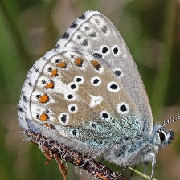

In [23]:
#lets check our model to providing an image to it
from PIL import Image
#import an image
image_path = "/content/drive/MyDrive/valid/ADONIS/1.jpg"
img = tf.keras.preprocessing.image.load_img(image_path,target_size=(180,180))
img

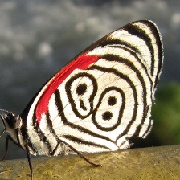

In [24]:
image_path="/content/drive/MyDrive/test/AN 88/4.jpg"
img = tf.keras.preprocessing.image.load_img(image_path,target_size=(180,180))
img

In [32]:
model.save("/content/drive/MyDrive")